- Author: Anderson Banihirwe
    
- Project: Tensorflow Recipes

 # Table of Contents
<div class="toc" style="margin-top: 1em;"><ul class="toc-item" id="toc-level0"><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/02-Decomposition-method.ipynb#Implementing-a-Decomposition-Method" data-toc-modified-id="Implementing-a-Decomposition-Method-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Implementing a Decomposition Method</a></span><ul class="toc-item"><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/02-Decomposition-method.ipynb#Generate-data" data-toc-modified-id="Generate-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Generate data</a></span></li><li><span><a href="http://localhost:8888/notebooks/03-Linear-Regression/02-Decomposition-method.ipynb#Solve" data-toc-modified-id="Solve-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Solve</a></span></li></ul></li></ul></div>

# Implementing a Decomposition Method

- Use the Cholesky decomposition, for which relevant functions exist in TensorFlow
- Using the built-in Cholesky decomposition method in TensorFlow. One reason people are
so interested in decomposing a matrix into more matrices is because the resulting matrices
will have assured properties that allow us to use certain methods efficiently. 
- Here we will solve the system, $Ax=b$, by writing it as $LL'x=b$. We will first solve $Ly=b$ and then solve $L'x=y$ to arrive at our coefficient matrix, $x$.


In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('seaborn')

## Generate data


In [2]:
x_vals = np.linspace(0, 10, 200) #.reshape(200, 1)
y_vals = x_vals + np.random.normal(0, 1, 200)

In [3]:
x_vals_column = np.transpose(np.matrix(x_vals))
ones_column = np.transpose(np.matrix(np.repeat(1, 200)))
A = np.column_stack((x_vals_column, ones_column))
b = np.transpose(np.matrix(y_vals))


In [4]:
# Turn A and B matrices into tensors
A_tsr = tf.constant(A)
b_tsr = tf.constant(b)

## Solve

In [5]:
tA_A       = tf.matmul(tf.transpose(A_tsr), A_tsr)
L          = tf.cholesky(tA_A)
tA_b       = tf.matmul(tf.transpose(A_tsr), b)
sol1       = tf.matrix_solve(L, tA_b)
sol2       = tf.matrix_solve(tf.transpose(L), sol1)

In [6]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Slope:  0.999948824494528
Y-intercept: 0.08028940771879271


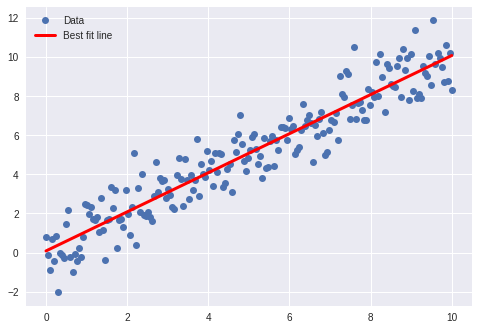

In [7]:
# start training
with tf.Session() as sess:
    sess.run(init)
    
    solution_eval = sess.run(sol2)
    
    # Extract the coefficients from the solution,the slop and the y-intercept
    slope = solution_eval[0][0]
    y_intercept = solution_eval[1][0]
    
    print('Slope:  {}'.format(slope) )
    print('Y-intercept: {}'.format(y_intercept))
    
    best_fit = []
    for i in x_vals:
        best_fit.append(slope * i + y_intercept)
        
    plt.plot(x_vals, y_vals, 'o', label='Data')
    plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
    plt.legend(loc='upper left')
    plt.show()
    
    

In [8]:
%load_ext version_information
%version_information tensorflow, numpy, matplotlib

Software versions
Python 3.6.2 64bit [GCC 4.8.2 20140120 (Red Hat 4.8.2-15)]
IPython 6.1.0
OS Linux 4.4.0 53 generic x86_64 with debian stretch sid
tensorflow 1.3.0
numpy 1.12.1
matplotlib 2.0.2
Sun Sep 17 20:54:29 2017 CDT